# Quantização Escalar

Quando representamos um sinal contínuo através de amostras, formando um sinal discreto, se a taxa de amostragem uniforme for superior à taxa de Nyquist, não haverá perda de informação, e assim será possível reconstituir o sinal contínuo a partir de suas amostras. O processo de amostragem não resulta em perda em fidelidade ao sinal original, desde que seja respeitada a taxa de Nyquist. A quantização gera uma representação em termos de amplitudes discretas, resultando em uma perda irreparável de fidedignidade. Combinando amostragem e quantização geramos uma sequência discreta de amostras com amplitudes discretas, às quais associamos palavras binárias distintas para cada uma das possíveis amplitudes discretas na saída do quantizador, produzindo assim uma representação digital de um sinal.

Quantização escalar é um mapeamento $Q$ de valores reais $x$ de uma variável aleatória
contínua $X$ nos valores $y = Q(x)$, mais próximos de $x$ (em termos de uma determinada medida de distorção),
de um conjunto discreto e finito $Y = {y_1 , y_2 , \ldots,  y_M }$.
Os valores $y_i$ , $i = 1, 2, \ldots , M$, são chamados níveis de saída, ou valores de representação,
ou ainda valores de aproximação. $Y$ é chamado de *codebook* ou conjunto de aproximação.

O quantizador escalar é determinado pelo conjunto de limiares
$\mathcal{T} = \{t_i\}$, $i=0, 1, \ldots, M$
e pelo conjunto de pontos de representação $\mathcal{Y} = \{y_i\}$, $i=1, \ldots, M$.
Os limiares dividem exaustivamente o domínio $\mathit{R}$ em subintervalos
(ou células, regiões de representação) $\Delta_i = (t_{i-1} , t_i ]$ disjuntas,
ou seja, $\Delta_i \cap \Delta_j = \emptyset$. Diz-se que a divisão é exaustiva
pois $\bigcup_{i=1}^M \Delta_i = \mathit{R}$. Esta divisão é tal que existe apenas
um $y_i$ associado a cada intervalo $\Delta_i$, ou seja, $y_i = Q(x)$ se e somente se
$x \in \Delta_i$.


![representação conceitual de um quantizador uniforme de 3 bits](imgs/quantizadoruniforme3bits.png)
(Alan V. Oppenheim e Ronald W. Schafer, Digital Signal Processing)



In [2]:
deta = 1;
N = 10; % numero de amostras
y = [-4, -3, -2, -1, 0, 1, 2, 3]; % codebook (pontos de representacao)
t = [-3.5, -2.5, -1.5, -0.5, 0.5, 1.5, 2.5]; % partition (limiares)
Xm = 4; % 2*Xm extensao do sinal
x = 2*Xm*rand(1,N)-Xm; % sinal aleatorio
xq = []; idx = [];
for xx=x,
  i = find(t >= xx, 1);
  if isempty(i), i=length(y); endif
  idx = [idx, i];
  xq = [xq, y(i)];
endfor
[x;xq;idx]

ans =

 Columns 1 through 8:

  -2.43484  -0.47520  -2.88671   2.11114   3.18706   0.56415   0.85590  -1.68972
  -2.00000   0.00000  -3.00000   2.00000   3.00000   1.00000   1.00000  -2.00000
   3.00000   5.00000   2.00000   7.00000   8.00000   6.00000   6.00000   3.00000

 Columns 9 and 10:

   3.73441   0.21679
   3.00000   0.00000
   8.00000   5.00000



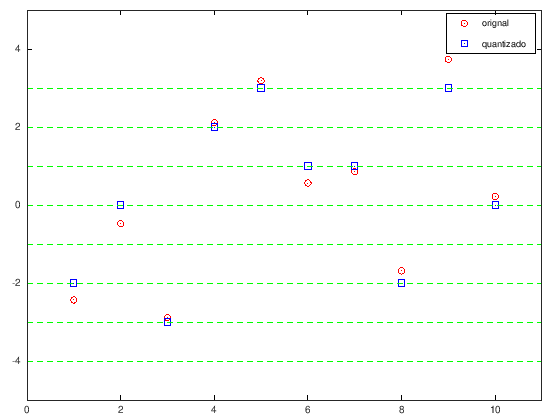

In [3]:
figure; plot(x,'ro',xq,'bs');
legend('orignal','quantizado');
axis([0 N+1 -Xm-1 Xm+1]);
for yy = y,
  line ([0 N+1], [yy yy], "linestyle", "--", "color", "g");
endfor

## Ruído de Quantização

É inerente ao processo de quantização a introdução de um erro, chamado *erro de quantização* ou *ruído de quantização*.

O erro de quantização (ou distorção) esperado é dado por
\begin{equation}
D(Q) = E\left\lbrace d(x,Q(x)) \right\rbrace ,
\end{equation}
onde $d(x,Q(x))$ é uma medida de distorção entre $x$ e $Q(x)$, dada por $d(\cdot)$.
  
A taxa de quantização é o número de bits $R$ que é utilizado na representação de um valor $x$. Ela é dada em bits por amostra.

Para um quantizador com taxa fixa temos $R = \log_2 M$ bits por amostra.

![ruído de quantização](imgs/quantizationerror.png)


In [4]:
M = length(y);
R = log2(M);
printf('O quantizador possui uma taxa de %.1f bits por amostra.\n',R);
function d = distorcao(x, xq, dist)
   d = sum(dist(x,xq))/length(x);
endfunction
mse = @(x,y) (x-y).^2;
d = distorcao(x,xq,mse);
printf('A distorcao media foi de %.3f.\n',d);

O quantizador possui uma taxa de 3.0 bits por amostra.
A distorcao media foi de 0.137.


## Função para quantização no GNU Octave

O pacote *communications* possui algumas uma função para fazer a quantização de um sinal: *quantiz*.

In [1]:
pkg load communications
help quantiz

'quantiz' is a function from the file /usr/share/octave/packages/communications-1.2.1/quantiz.m

 -- Function File: QIDX = quantiz (X, TABLE)
 -- Function File: [QIDX, Q] = quantiz (X, TABLE, CODES)
 -- Function File: [ QIDX, Q, D] = quantiz (...)

     Quantization of an arbitrary signal relative to a partitioning.

     'qidx = quantiz (x, table)'
          Determine position of x in strictly monotonic table.  The
          first interval, using index 0, corresponds to x <= table(1).
          Subsequent intervals are table(i-1) < x <= table(i).

     '[qidx, q] = quantiz (x, table, codes)'
          Associate each interval of the table with a code.  Use
          codes(1) for x <= table(1) and codes(n+1) for table(n) < x <=
          table(n+1).

     '[qidx, q, d] = quantiz (...)'
          Compute distortion as mean squared distance of x from the
          corresponding quantization values.

Additional help for built-in functions and operators is
available in the online version of

O código anterior pode ser substituído por esta função, conforme o exemplo abaixo. Note ainda que a função pode ser chamada sem passar o *codebook* como parâmetro. Se o resultado desejado for apenas os índices, o *codebook* não é necessário. Caso o resultado desejado contemple também os valores quantizados, o *codebook* deverá ser passado como parâmetro.

In [7]:
[idx2, xq2, d2] = quantiz (x, t, y);
disp(d);
disp(sum(xq - xq2))

 0.13684
0


## Entropia na saída do quantizador

As probabilidades dos níveis de representação de um quantizador podem ser determinadas, conhecendo-se a pdf do sinal.

Seja $f(x)$ a pdf (função densidade de probabilidade) de $X$. Podemos calcular a probabilidade do $i$-ésimo nível de reprodução (a probabilidade de $x \in \Delta_i$) como
\begin{equation}
  P(y_i) = \int_{t_i -1}^{t_i} f(x) \mathrm{d}x .
\end{equation}

A entropia da saída do quantizador é igual a
\begin{equation}
  H(Y) = - \sum_{i=1}^{M} P(y_i) \log_2 P(y_i) .
\end{equation}

Um código de comprimento variável poder ser utilizado para representar a saída do quantizador (exemplo: código de Shannon, código Huffman, ou codificação aritmética).



## Quantização escalar uniforme

A quantização escalar é uniforme quando os limiares estão igualmente espaçados, e desta forma, as células possuem o mesmo tamanho (exceto as extremas, primeira e última), ou seja, $\vert \Delta_i \vert = \delta$, e o ponto de representação localiza-se no ponto médio da célula,
\begin{equation}
  y_i = \frac{t_{i-1} + t_i}{2} = t_{i-1} + \frac{\delta}{2} , \ \ i=1,2,\ldots,M .
\end{equation}

### Quantizador escalar uniforme para valores não negativos

Dada a entrada $x$, a célula associada a $x$ é determinada por
\begin{equation}
  i = \lfloor x / \delta \rfloor ,
\end{equation}
onde $\delta$ é a largura de cada célula e $\lfloor \cdot \rfloor$ representa a função piso, operação de arredondamento para o maior inteiro menor ou igual ao argumento.
  
O valor de aproximação para a entrada $x$ é dado por
\begin{equation}
 y = Q(x) = \delta \left\lfloor \frac{x}{\delta} \right\rfloor   
\end{equation}
isto é, a $i$-ésima célula é determinada por $\Delta_i = (i\delta, (i+1)\delta]$ e $y_i = i\delta + \delta/2$.



### Exemplo: quantização de uma imagem

Vejamos o exemplo da quantização de uma imagem em tons de cinza. 

As valores dos pixels da imagem original em tons de cinza, codificada com 8 bits/amostra, estão no invervalor [0,255], ou seja, o valor dos pixels assume qualquer valor inteiro em [0,255]. No exemplo abaixo iremos quantizar esta imagem utilizando 2 bits/amostra. Para tanto, iremos utilizar o quantizador uniforme apresentado abaixo. A seguir segue o exemplo em Octave.

![quantizador](imgs/quantizimg255.png)

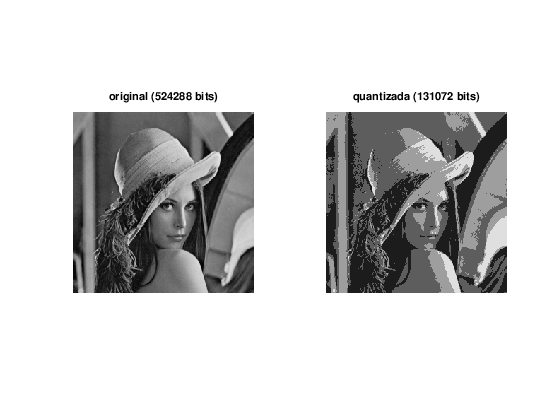

In [9]:
X = imread('imgs/lena256bw.pnm');
nbits = 2;
delta = 256/2^nbits; % valor dos pixels no intervalo [0, 255]
codebook = [delta/2-1:delta:255-delta/2]; 
partition = [delta-1:delta:255-delta];
x = double(X(:));
idx = floor(x/delta);
% de forma equivalente, podemos utilizar a funcao quantiz
% [idx, xq, d] = quantiz(x,partition,codebook);
xq = codebook(idx+1)';
Xq = reshape(xq,size(X));
sizeX = prod(size(X))*8; % numero de bits utilizados para armazenar a imagem original
sizeXq = prod(size(Xq))*nbits; %     "      imagem quantizada
tit1 = sprintf('original (%d bits)',sizeX);
tit2 = sprintf('quantizada (%d bits)',sizeXq);
figure; subplot(1,2,1); imshow(X); title(tit1); subplot(1,2,2); imshow(uint8(Xq)); title(tit2);

In [10]:
d = distorcao(x,xq,mse);
printf('A distorcao media foi de %.3f.\n',d);

% comparando com o resultado da funcao quantiz
[idx, xq, d] = quantiz(x,partition,codebook);
d

A distorcao media foi de 345.015.
d =  345.01


## Distorção no quantizador escalar uniforme

Se $f(x)$ é conhecida, então podemos calcular a distorção esperada do quantizador
\begin{equation}
  D(Q) = \int_{-\infty}^{\infty} f(x) d(x,Q(x)) dx = \sum_i \int_{t_{i-1}}^{t_i} f(x) d(x,y_i) \mathrm{d}x .
\end{equation}

Se o erro de distorção é medido pelo erro quadrático, então $D(Q)$ fornecerá o erro quadrático médio (MSE, *Mean Squared Error*):
\begin{equation}
  D(Q) = \sum_i \int_{t_{i-1}}^{t_i} f(x) (x - y_i)^2 \mathrm{d}x .
\end{equation}


## Quantizador não uniforme

Suponha que $X \sim f$, onde $f$ é uma distribuição não-uniforme.

Por exemplo:
\begin{equation}
  f(x) = \frac{1}{\sigma \sqrt{2\pi}} \exp \left( - (x - \mu)^2 / (2\sigma^2) \right)
\end{equation}

![distribuição gaussiana](imgs/gaussian.png)

Note que neste caso a quantização uniforme não será aquela que fornecerá o menor valor esperado da distorção. O quantizador com menor distorção será tal que cada intervalo $\Delta_i$ terá a mesma massa de probabilidade e o ponto de representação de cada intervalo será dado pelo valor esperado no intervalo.

De forma geral, não conhecemos a distribuição subjacente do sinal que queremos quantizar. Iremos então ver a abordagem proposta por Lloyds para buscar o quantizador ótimo.


## Método de Lloyd

Lloyd propôs um método iterativo, chamado de 'método I', para o projeto de um quantizador escalar (Lloyd, 1982).
O algoritmo para o caso de dados com uma distribuição de probabilidade desconhecida é dado a seguir:
1. Seja $M$ o número de pontos de representação e $\epsilon \geq 0$, um limiar de distorção. Considere um conjunto de representação inicial $\mathcal{C}^{(0)} = \{\hat{x}_1^{(0)} , \ldots, \hat{x}_M^{(0)}\}$, um conjunto de treinamento $\mathcal{T} = \{x_1, \ldots, x_N\}$ e $m=0$, o número inicial de iterações.
2. Dado $\mathcal{C}^{(m)}$ encontre a partição mínima $P(\mathcal{C}^{(m)}) = \{S_i^{(m)}: i=1,\ldots,M\}$ das sequências de treinamento: $x_j \in S_i^{(m)}$ se $d(x_j, \hat{x}_i^{(m)}) \leq d(x_j, \hat{x}_l^{(m)})$, para todo $l \neq i$. Calcule, então, a distorção média definida por:
\begin{align}
D^{(m)} &= D[(\mathcal{C}^{(m)}, P(\mathcal{C}^{(m)}))] \\
        &= \frac{1}{N} \sum_{j=1}^{N} \min_{\hat{x} \in \mathcal{C}^{(m)}} d(x_j, \hat{x}) .
\end{align}
3. Se $(D^{(m-1)} - D^{(m)}) / D^{(m)} \leq \epsilon$, interrompe a iteração e considera-se $\mathcal{C}^{(m)}$ como o alfabeto final de representação (*codebook*); caso contrário, continue.
4. Encontre o alfabeto ótimo de representação para $P(\mathcal{C}^{(m)})$, $\hat{x}(P(\mathcal{C}^{(m)})) = \{\hat{x}(S_i): i = 1,\ldots, M\}$ para $P(\mathcal{C}^{(m)})$, onde
\begin{equation}
\hat{x}(S_i) = \frac{1}{|| S_i ||} \sum_{x \in S_i} x .
\end{equation}
5. Faça $\mathcal{C}^{(m+1)} = \hat{x}(P(\mathcal{C}^{(m)}))$, incremente $m$ e volte ao passo 2.

O algoritmo descrito acima utiliza um determinado $\mathcal{C}^{(0)}$ como *codebook* inicial para o processo de otimização. Existem diversas maneiras de escolher um alfabeto inicial, a mais simples delas consiste em escolher pontos de representação espaçados e coincidentes com os dados de treinamento, ou seja, os dados utilizados para se estabelecer o *codebook*.

O problema das $k$ médias é um problema NP-difícil, desta forma, qualquer algoritmo utilizável levará a uma solução ótima local para o problema. Métodos iterativos, como o de Lloyds, garantem melhorias sucessivas na solução a partir de um ponto inicial. Como a função de minimização, em geral, não é convexa, cada mínimo local terá uma região de atração para si. Os parâmetros de inicialização podem levar a diferentes soluções, algumas melhores que as demais.



### Lloyds no GNU Octave

No pacote *communications* do GNU Octave há a função *lloyds* que implementa o método de Lloyds. Basta fornecer o sinal e um *codebook* inicial (ou o tamanho do *codebook*, neste caso o método assumirá como *codebook* inicial o *codebook* uniforme). A saída do algoritmo será o quantizador (limiares e pontos de representação) que minimiza a distorção para o sinal dado.

In [ ]:
help lloyds

'lloyds' is a function from the file /usr/share/octave/packages/communications-1.2.1/lloyds.m

 -- Function File: [TABLE, CODES] = lloyds (SIG, INIT_CODES)
 -- Function File: [TABLE, CODES] = lloyds (SIG, LEN)
 -- Function File: [TABLE, CODES] = lloyds (SIG, ..., TOL)
 -- Function File: [TABLE, CODES] = lloyds (SIG, ..., TOL, TYPE)
 -- Function File: [TABLE, CODES, DIST] = lloyds (...)
 -- Function File: [TABLE, CODES, DIST, RELDIST] = lloyds (...)

     Optimize the quantization table and codes to reduce distortion.
     This is based on the article by Lloyd

     S. Lloyd _Least squared quantization in PCM_, IEEE Trans Inform
     Theory, Mar 1982, no 2, p129-137

     which describes an iterative technique to reduce the quantization
     error by making the intervals of the table such that each interval
     has the same area under the PDF of the training signal SIG.  The
     initial codes to try can either be given in the vector INIT_CODES
     or as scalar LEN.  In the case of a 

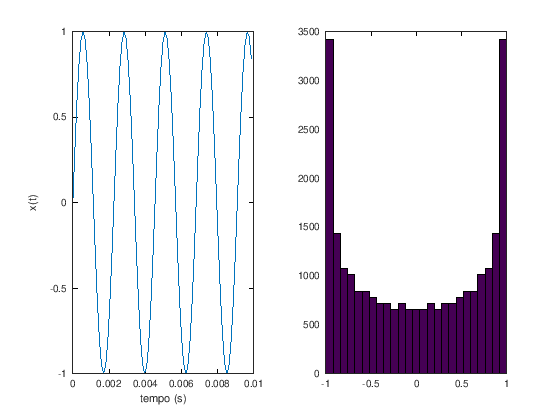

In [11]:
fs = 8820; % Hz
f0 = 440; % Hz  (A4)
t = [0:1/fs:3]'; % vetor tempo (s)
x = sin(2*pi*f0*t);
W = 10E-3; % janela de 10 ms
WL = floor(W*fs); % # de amostras
figure; subplot(1,2,1);
plot(t(1:WL),x(1:WL)); ylabel('x(t)'); xlabel('tempo (s)');
subplot(1,2,2); hist(x,25);
% player = audioplayer(x, fs, 12);
% play(player);
sound(x,fs);

distorcao = 0.030


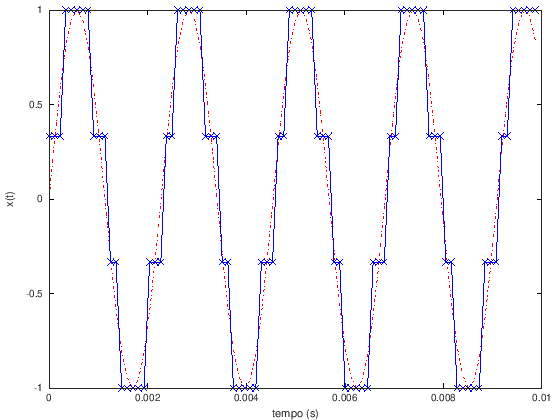

In [12]:
nbits = 2;
M = 2^nbits;
xmax = 1; xmin = -1;
u_codebook = [0:M-1]' / (M - 1) * (xmax - xmin) + xmin;
u_partition = (u_codebook(1:M-1) + u_codebook(2:M))/2;
[idx, xq, d] = quantiz(x, u_partition, u_codebook);
figure; plot(t(1:WL),x(1:WL),'r-.',t(1:WL),xq(1:WL),'b-x'); ylabel('x(t)'); xlabel('tempo (s)');
% player = audioplayer(xq, fs, 12);
% play(player);
sound(xq,fs);
printf('distorcao = %.3f\n',d);

distorcao = 0.021


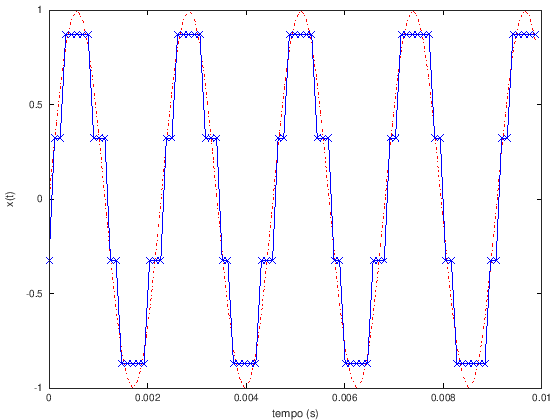

In [13]:
[l_partition, l_codebook] = lloyds (x, M);
[idx, xq, d] = quantiz(x, l_partition, l_codebook);
figure; plot(t(1:WL),x(1:WL),'r-.',t(1:WL),xq(1:WL),'b-x'); ylabel('x(t)'); xlabel('tempo (s)');
% player = audioplayer(xq, fs, 12);
% play(player);
sound(xq,fs);
printf('distorcao = %.3f\n',d);

## Performance do Quantizador

Seja $p(x)$ a pdf do sinal de entrada $x$, então o erro médio quadrático (MSE) devido à quantização será dado por

\begin{equation} \label{eq-sqnr-quants} \tag{eq-1}
  \sigma_q^2 = \sum_{k=1}^{M} \int_{t_{k-1}}^{t_k} (x - y_k)^2 p(x) \mathrm{d}x.
\end{equation}

Se $M$ for grande e a pdf $p(x)$ for suave, poderemos aproximar $p(x)$ no intervalo $(t_{k-1},t_{k}]$ como  \begin{equation} \tag{eq-2}
  p(x) \approx p\left(\frac{t_{k-1}+t_{k}}{2}\right) , \quad t_{k-1} < x \leq t_k ,
\end{equation}
e assim, a equação \ref{eq-sqnr-quants} poderá ser reescrita como
\begin{equation} \label{eq-sqnr-quants2} \tag{eq-3}
  \sigma_q^2 = \sum_{k=1}^{M} p\left(\frac{t_{k-1}+t_{k}}{2}\right) \int_{t_{k-1}}^{t_k} (x - y_k)^2 \mathrm{d}x.
\end{equation}

Mostra-se que
\begin{equation} \label{eq-sqnr-int} \tag{eq-4}
  \int_{t_{k-1}}^{t_k} (x - y_k)^2 \mathrm{d}x = \Delta_k \left[ \left( y_k - \frac{t_{k-1} + t_{k}}{2} \right)^2 + \frac{\Delta_k^2}{12} \right] ,
\end{equation}
onde $\Delta_k = t_k - t_{k-1}$ é o tamanho do passo do quantizador.

Para minimizar o MSE devemos escolher $y_k = (t_{k-1} + t_{k})/2$, de forma que o primeiro termo em \ref{eq-sqnr-int} se anule. Ou seja, devemos escolher os pontos de representação como o ponto médio dos limiares dos intervalos (obs.: isto ocorre devido à aproximação feita para $p$ suave e $M$ grande; no caso geral, deveremos ter os pontos de representação no valor esperado de cada intervalo).

Vamos definir $p_k$ como a probabilidade de $x$ pertencer ao intervalo $(t_{k-1},t_k]$.  Usando a aproximação feita anteriormente, teremos
\begin{equation} \label{eq-pk-aprox} \tag{eq-5}
  p_k = \Pr(t_{k-1} < x \leq t_k) \approx p\left(\frac{t_{k-1}+t_{k}}{2}\right) \Delta_k ,
\end{equation}
e assim podemos reescrever a equação \ref{eq-sqnr-quants2} como
\begin{equation} \label{eq-sqnr-quants3}
  \sigma_q^2 = \frac{1}{12} \sum_{k=1}^{M} p_k \Delta_k^2 .
\end{equation}

### Performance do Quantizador Uniforme

Para o quantizador uniforme o passo é constante ($\Delta_k = \Delta$ para todo $k$). Teremos assim
\begin{equation} \label{eq-sqnr-quants-uni} \tag{eq-6}
  \sigma_q^2 = \frac{\Delta^2}{12} \underbrace{ \sum_{k=1}^{M} p_k }_{=1} = \frac{\Delta^2}{12} .
\end{equation}
Note que a potência do ruído de quantização é independente da distribuição do sinal.

A performance do quantizador será expressa pela relação sinal-ruído de quantização (SQNR),
\begin{equation} \label{eq-sqnr-unif} \tag{eq-7}
  \textrm{SQNR} = 10 \log \left( \frac{\sigma_x^2}{\sigma_q^2} \right) = 10 \log \left( \frac{12 \sigma_x^2}{\Delta^2} \right) \mathrm{dB}.
\end{equation}

#### Sinal Senoide

Vamos supor que o sinal de entrada seja da forma $A \sin \omega t$ e um quantizador uniforme com $n$ bits ($2^n = M$). Podemos escolher $\Delta$ para que não ocorra saturação. Faremos então $\Delta = A/2^{n-1}$. A potência do sinal senoidal é $\sigma_x^2 = A^2/2$. Usando agora a Equação \ref{eq-sqnr-unif}, teremos
\begin{equation} \label{eq-sqnr-unif-sin} \tag{eq-8}
 \textrm{SQNR (senoide)}  = 6n + 1.76 \mathrm{dB}.
\end{equation}

#### Sinal Gaussiano

Iremos supor agora um sinal de entrada com distribuição gaussiana: $p(x)=1/\sqrt{2\pi\sigma} e^{-(x^2/2\sigma^2)}$.
Para que a distorção por saturação seja desprezível, iremos fazer $2^{n-1} \Delta = 4 \sigma$, ou seja, teremos $\Delta = \sigma/2^{n-3}$.
A potência média quadrática do sinal de entrada é $\sigma_x^2 = \sigma^2$. Usando agora a Equação \ref{eq-sqnr-unif}, teremos
\begin{equation} \label{eq-sqnr-unif-gaus} \tag{eq-9}
  \textrm{SQNR (gauss)}  = 6n - 7.3 \mathrm{dB}.
\end{equation}


In [19]:
function S=snr(x,y), S=10*log10(sum(x.^2)/sum(y.^2)); endfunction
sqnr = snr(x,xq-x);
printf('A SQNR obtiada foi de %.2f dB\n',sqnr);
printf('A SQNR dada pela fórmula para sinal senoidal é de %.2f dB\n', 6*nbits+1.76);

A SQNR obtiada foi de 13.67 dB
A SQNR dada pela fórmula para sinal senoidal é de 13.76 dB


### Quantizador Não-Uniforme


Os sinais de fala, por exemplo, estão geralmente concentrados em torno da origem. Desta forma, seria interessante propor um quantizador em que os passos de quantização fossem menores na região de menor amplitude do sinal e maiores na região de maior amplitude. Isto levaria a uma redução do ruído de quantização total.

![Exemplo de um quantizador não uniforme com 4 bits.](imgs/nuquantz.png)

### Compressor e Expansor

Podemos utilizar compressor e expansor para implementar um quantizador não uniforme.

- compressor: é feito para amplificar os sinais de baixa amplitude, às custas de atenuar os sinais de alta amplitude;
- expansor: faz o inverso.

![Compressor e Expansor](imgs/compressor.png)

O erro médio quadrático devido à quantização é dado pela Equação \ref{eq-sqnr-quants3}, repetida a seguir,
\begin{equation} \tag{eq-10}
  \sigma_q^2 = \frac{1}{12} \sum_{k=1}^{M} p_k \Delta_k^2  , \nonumber
\end{equation}
onde $p_k = \Pr(t_{k-1} < x \leq t_k)$ e $\Delta_k = (t_k - t_{k-1})$.

Suponha que o compressor apresentado na Figura abaixo seja utilizado.

![Exemplo de compressor.](imgs/excompressor.png)




Os limiares $t_{k-1}$ e $t_{k}$, correspondentes a um codificador não uniforme, são mapeados através da função compressora $F(\cdot)$ nos limiares $F(t_{k-1})$ e $F(t_k)$, uniformemente espaçados.
Supondo o sinal no intervalo $[-1,+1]$, teremos $\Delta = 2/M$, o passo do codificador uniforme.
Conhecendo $\Delta$ e a derivada (inclinação) de $F(t)$ no intervalo $[t_{k-1},t_{k}]$, podemos determinar $\Delta_k$,
\begin{equation}\label{eq-dk-F} \tag{eq-11}
 \Delta_k = \frac{\Delta}{F'(t_k^{\ast})} = \frac{2}{M F'(t_k^{\ast})}, \quad t_{k-1} < t_k^\ast < t_k .
\end{equation}

Substituindo $\Delta_k$ na Equação \ref{eq-sqnr-quants3}, teremos
\begin{equation} \label{eq-sqnr-q-nu} \tag{eq-12}
 \sigma_q^2 = \frac{1}{3} \sum_{k=1}^{M} \frac{p_k}{M^2 (F'(t_k^{\ast}))^2} , \quad t_{k-1} < t_k^\ast < t_k .
\end{equation}

Se o número de níveis $M$ for grande, o somatório em \ref{eq-sqnr-q-nu} poderá ser aproximado por uma integral:
\begin{equation} \label{eq-sqnr-q-nu2} \tag{eq-13}
  \sigma_q^2 = \frac{1}{3M^2} \int_{-1}^{+1} \frac{p(x)}{ (F'(x))^2 } \mathrm{d}x = \frac{2}{3M^2} \int_{0}^{+1} \frac{p(x)}{ (F'(x))^2 } \mathrm{d}x  ,
\end{equation}
onde utilizamos a simplificação em que a $p(x)$ é simétrico par.



Para um sinal com excursão entre $-X_m$ e $+X_m$, teremos
\begin{equation} \label{eq-sqnr-q-nu2} \tag{eq-14}
  \sigma_q^2 = \frac{2 X_m^2}{3M^2} \int_{0}^{X_m} \frac{p(x)}{ (F'(x))^2 } \mathrm{d}x  .
\end{equation}

### Compressão Logarítmica

Em um sistema de telecomunicações, desejamos uma SNR constante, independente da distribuição do sinal de entrada.
Desejamos então encontrar o compressor $F$ que alcança este objetivo.

\begin{equation} \label{eq-sqnr-log-const} \tag{eq-15}
\textrm{SNR} = \frac{\sigma_x^2}{\sigma_q^2} = \frac{2 \int_0^1 x^2 p(x) \mathrm{d}x}{ \frac{2}{3M^2} \int_0^1 \frac{p(x)}{(F'(x))^2} \mathrm{d}x } .
\end{equation}
A expressão em \ref{eq-sqnr-log-const} pode ser feita constante escolhendo
\begin{equation} \label{eq-dcompr} \tag{eq-16}
  F'(x) = \frac{k^{-1}}{x} ,
\end{equation}
com parâmetro $k$ a ser especificado.

A curva de compressão $F(x)$ é obtida realizando-se a integração e escolhendo a constante de integração
para que a condição de contorno $F(1)=1$ seja satisfeita, obtendo assim
\begin{equation} \label{eq-compr} \tag{eq-17}
  F(x) = 1 + k^{-1} \ln x .
\end{equation}
Para este caso a SNR obtida será
\begin{equation} \label{eq-sqnr-log-const2} \tag{eq-18}
  \textrm{SNR} =  \frac{3M^2}{k^2} .
\end{equation}
Para sinal com extensão de $-X_m$ a $X_m$, teremos
\begin{equation} \label{eq-compr2} \tag{eq-19}
  F(x) = X_m + k^{-1} \ln \left(\frac{x}{X_m}\right) .
\end{equation}

![F(x)](imgs/Fx.png)

Através da Equação \ref{eq-dk-F} e da escolha feita em \ref{eq-dcompr}, podemos verificar
que o tamanho do passo de quantização é proporcional à amplitude do sinal, quando utilizamos
a compressão logarítmica dada por $F(x) = 1 + k^{-1} \ln x$.
\begin{equation} \tag{eq-19}
  \Delta_k = \frac{2}{M F'(t_k^{\ast})} = \frac{2}{M k^{-1}} t_k^{\ast} .
\end{equation}
Para valores próximo da origem, esta proporcionalidade não poderá ser mantida, pois $\ln x$ diverge quando $x \rightarrow 0$.

Uma lei de compressão prática não pode ter tal descontinuidade, devendo também especificar a compressão dada a sinais de baixa amplitude.


#### lei $\mu$

Esta aproximação desloca o cruzamento com zero de $F(x)$, que ocorria em $x = e^{-k}$, para a origem.

\begin{equation}
  F(x) = \frac{\log (1 + \mu x)}{ \log (1 + \mu)} , \quad 0 \leq x \leq 1 ,
\end{equation}
onde a base do logaritmo é irrelevante.

\begin{equation}
   F(x) = \sign (x) \frac{\log (1 + \mu |x|)}{ \log (1 + \mu)} , \quad -1 \leq x \leq 1 .
\end{equation}

No que, quando $\mu \gg 1$, esta lei aproxima uma curva logaritma para valores grandes.
\begin{equation}
  F(x) = \frac{\log (1 + \mu x)}{\log(1+\mu)} \approx \frac{\log(\mu x)}{\log(\mu)} = 1 + \frac{\log(x)}{\log(\mu)} = 1 + \frac{\ln x}{\ln \mu} .
\end{equation}
Teremos então $k = \ln \mu$ e assim a SNR para sinais grandes será aproximadamente $3M^2/(\ln \mu)^2$.

![lei mu](imgs/mulaw.png)

A lei $\mu$ é utilizada no padrão ITU G.711 PCM através de uma aproximação discreta usando $\mu=255$. Outro valor comumente usando para $\mu$ é 100. Abaixo veremos alguns exemplos de utilização da lei $\mu$ e relação do valor de $\mu$ com a SQNR (relação sinal-ruído de quantização).

#### lei A

![lei A](imgs/Alaw.png)

\begin{equation}
 k = 1 + \ln A .
\end{equation}

\begin{equation}
  F(x) = \begin{cases}
  \frac{Ax}{1+\ln A} , \quad 0 \leq x \leq 1/A , \\
  \frac{1+\ln Ax}{1+\ln A}, \quad 1/A \leq x \leq 1 .
  \end{cases}
\end{equation}



play sounds? (yes_or_no) no
filename = /ms/downloads/samples/speech/poemas/drummond/Drummond_Autran_O_elefante.ogg
SQNR = 9.05
SQNR = 16.94


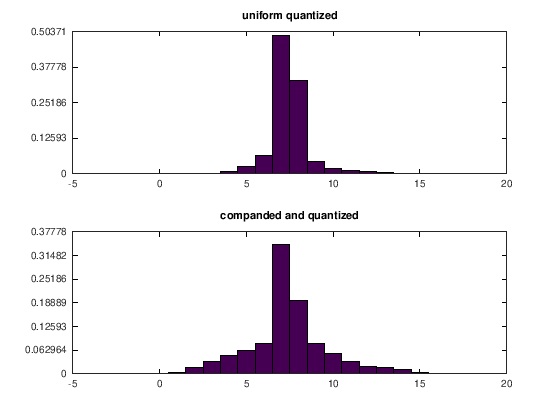

In [1]:
pkg load communications

function S=snr(x,y), S=10*log10(sum(x.^2)/sum(y.^2)); endfunction
function [partition, codebook] = uniformquantz(Nbits, Xrange),
Xmin=Xrange(1); Xmax=Xrange(2);
N = 2^Nbits;
range = Xmax-Xmin;
delta = range/N;
partition = [Xmin+delta : delta : Xmax-delta];
codebook = [Xmin+delta/2 : delta : Xmax-delta/2];
endfunction

playsound = yes_or_no ('play sounds?');

filename = '/ms/downloads/samples/speech/poemas/drummond/Drummond_Autran_O_elefante.ogg'
info = audioinfo ( filename );
[ x, fs ] = audioread ( filename );

% convert stereo to mono
x = sum( x, 2)/2;

if playsound,
  player = audioplayer (x, fs, 16);  % 16 bits >> 96 dB SQNR
  play ( player );
  pause(3);
  stop ( player );
endif

% uniform quantizer
Nbits = 4;
[partition, codebook] = uniformquantz(Nbits, [-1 1]);
[ idxq, xq, Dq] = quantiz ( x, partition, codebook );
printf('SQNR = %.2f\n', snr(x,xq'-x));
if playsound,
  player = audioplayer (xq, fs, 16);
  play ( player );
  pause(3);
  stop ( player );
endif

% using mu-law
mu = 15;%255;
xc = compand (x, mu, 1, "mu/compressor");
[ idxcq, xcq, Dcq] = quantiz ( xc, partition, codebook );
xqu = compand (xcq, mu, 1, "mu/expander");
printf('SQNR = %.2f\n', snr(x,xqu'-x));
figure(1); nbins = min(32,2^Nbits); bins = linspace(0,2^Nbits-1,nbins);
subplot(2,1,1); hist(idxq,bins); title('uniform quantized'); yt = get(gca, 'YTick'); set(gca, 'YTick',yt, 'YTickLabel', yt/length(x));
subplot(2,1,2); hist(idxcq,bins); title('companded and quantized'); yt = get(gca, 'YTick'); set(gca, 'YTick',yt, 'YTickLabel', yt/length(x));

if playsound,
  player = audioplayer (xqu, fs, 16);
  play ( player );
  pause(3);
  stop ( player );
endif

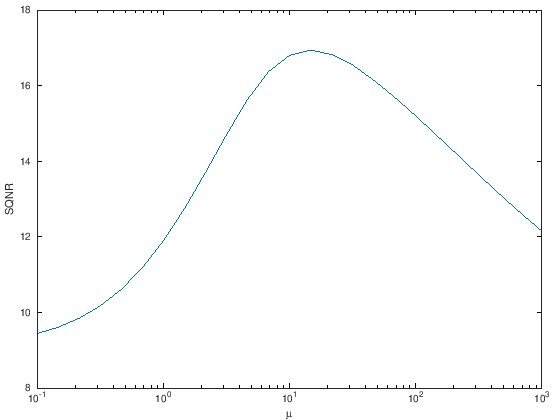

In [6]:
sqnr = [];
muv = logspace(-1,3,25);
for mu = muv,
  xc = compand (x, mu, 1, "mu/compressor");
  [ idxcq, xcq, Dcq] = quantiz ( xc, partition, codebook );
  xqu = compand (xcq, mu, 1, "mu/expander");
  sqnr = [sqnr snr(x,xqu'-x)];
endfor
figure(2); semilogx(muv,sqnr); xlabel('\mu'); ylabel('SQNR');

A figura a seguir ([Mehmet Safak, Digital Communications](https://books.google.com.br/books?id=v3rfDQAAQBAJ&pg=PA201)) apresenta a relação de SQNR (relação sinal-ruído de quantização) com o valor do parâmetro $\mu$ para diferentes distribuições de Laplace com valor central (localização) nulo e parâmetro de escala $1/b$. O valor $b=0$ corresponde à distribuição uniforme. Quão maior o valor de $b$ mais concentrada estará a massa da distribuição em torno de seu centro.

![relação de $\mu$ com a SWNR](imgs/mulaw_sqnr_vs_mu.png)

# Quantização Vetorial

Na quantização escalar os valores escalares são quantiados individualmente. Já no caso da quantização vetorial, blocos ou vetores de escalares são tratados como uma única entidade e assim quantizados em blocos. A princípio, parece que esta abordagem será útil apenas quando houver dependência ou correlação entre as componentes escalares que compõem um bloco. Entretanto, a quantização vetorial, teoricamente, é sempre capaz de levar a melhores resultados, o que é explicado pela teoria de taxa de distorção de Shannon. Podemos utilizar a quantização vetorial em casos em que o sinal de entrada já é um sinal digital e queremos obter uma representação comprimida da informação origial. Em geral, representamos os dados originais através de um *codebook* formado por vetores (ou blocos). Embora a teoria de Shannon aponte um limite para representação da informação, ela não fornece uma maneira de realizar a codificação a fim de atingir este limite. Alguns métodos são usuais para realizar o projeto de um quantizador vetorial, por exemplo, o algoritmo LBG (Linde, Buzo e Gray) , o algorítmo do corte de mediana (*median cut*), dentre outros.

Considere uma variável aleatória $X$ que assumule valores $x \in \mathcal{X} \subseteq \mathit{R}$, e $\mathcal{X}^n \subseteq \mathit{R}^n$ o conjunto de vetores $\mathbf{x} = (x_1, x_2, \ldots, x_n) \in \mathit{R}^n$.

Uma quantização vetorial é um mapeamento $Q$ de vetores de entrada $\mathbf{x} = (x_1, x_2, \ldots, x_n )$, onde $\mathbf{x} \in \mathcal{X}^n$, nos valores $\mathbf{y} = (y_1 , y_2 , \ldots , y_n ) \in \mathcal{X}^n$ mais próximos (com relação a alguma medida de distorção), onde $\mathbf{y} \in \mathcal{Y} \subseteq \mathcal{X}^n$, sendo $\mathcal{Y} = \{y_1 , y_2 , \ldots, y_M\}$, um subconjunto constituído por $M$ elementos em $\mathcal{X}^n$. O parâmetro $n$ indica a dimensionalidade dos dados e do quantizador. O conujunto de aproximação $\mathcal{Y}$ é chamado de *codebook*.

Para se projetar um quantizador, devemos dividir o domínio $\mathcal{X}^n$ em $M$ áreas ou células $S_i$, $i = 1, 2, \ldots, M$, de forma exaustiva e disjunta, ou seja, $\bigcup_i S_i = \mathcal{X}^n$ e $S_i \cap S_j = \emptyset$, $i \neq j$. Os pontos de representação devem pertencer à região que representam, $\mathbf{y}_i \in S_i$, e assim $Q(\mathbf{x}) = \mathbf{y}_i, \ \forall \mathbf{x} \in S_i$.

O projeto do quantizador consiste em especificar os pontos de representação $\mathbf{y}_i$ e as células $S_i$. Note que no caso unidimensional, $n=1$, as células tornam-se intervalos em $\mathit{R}^1$. Neste caso, a escolha das regiões consiste em escolher intervalos disjuntos em $\mathit{R}^1$, definidos por pontos limiares. No caso $n>1$, as partições podem ter qualquer forma e, desta forma, existe uma infinidade de candidatos a partições, sendo então mais complexa a tarefa de encontrar o conjunto ótimo de candidatos a partições. Mesmo para o caso uniforme a tarefa ainda sim é complexa pois, ainda que as regiões sejam translações de uma mesma forma, existem diversas formas possíveis a serem utilizadas, como por exemplo: quadrados, hexágonos, triâgulos, etc., no caso bidimensional. 

## Erro de quantização médio

O erro de quantização esperado de um quantizador é dado por
\begin{equation}
  D_n(Q) = E \{ d(\mathbf{x},Q(\mathbf{x})) \}
\end{equation}

Utilizando a distância Euclideana normalizada como métrica
\begin{eqnarray}
  d(\mathbf{x},\mathbf{y}) &=& \frac{1}{n} d^2_E(\mathbf{x},\mathbf{y}) \nonumber \\
                           &=& \frac{1}{n} (\mathbf{x} - \mathbf{y}) (\mathbf{x} - \mathbf{y})^T \nonumber \\
                           &=& \frac{1}{n} \sum_{i=1}^n (x_i - y_i)^2 = \frac{1}{n} \Vert \mathbf{x} - \mathbf{y} \Vert^2
\end{eqnarray}

teremos
\begin{equation}
  D_n (Q) = \frac{1}{n} E \{ \Vert \mathbf{x} - Q(\mathbf{x}) \Vert^2 \} = \frac{1}{n} \sum_{i=1}^M  E \{ \Vert \mathbf{x} - \mathbf{y_i} \Vert^2 \} .
  \label{eq:avg_quant_error}
\end{equation}

Considere que a pdf n-dimensional dos dados, $f(\mathbf{x})$, sobre o conjunto $\mathcal{X}^n$ seja conhecida, então a Equação \ref{eq:avg_quant_error} assume a forma 
\begin{equation}
  D_n (Q) = \frac{1}{n} \sum_{i=1}^M \int_{S_i} f(\mathbf{x}) \Vert \mathbf{x} - \mathbf{y_i} \Vert^2 \mathrm{d}\mathbf{x} ,
\end{equation}
e a probabilidade do vetor de representação $\mathbf{y_i}$ é dada por
\begin{equation}
  P(\mathbf{y_i}) = \int_{S_i} f(\mathbf{x}) \mathrm{d}\mathbf{x} .
\end{equation}



## Taxa de quantização

A taxa de quantização $R$ é o número de bits necessários para representar o vetor $\mathbf{x}$ (utilizando os vetores do *codebook*) por dimensão, $n$. Para um quantizador com taxa fixa (em que cada símbolo é codificado por palavras de mesmo tamanho em um dado *codebook*), a taxa é dada por
\begin{equation}
  R = \frac{\log_2 M}{n} \mathrm{\ bits/amostra}.
\end{equation}

Para um quantizador de taxa variável, a taxa estará limitada pela entropia, ou seja,
\begin{equation}
  R \geq - \frac{1}{n} \sum_{i=1}^M P(\mathbf{y_i}) \log_2 P(\mathbf{y_i}) \mathrm{\ bits/amostra}.
\end{equation}

## Performance de um quantizador

A performance de um quantizador é determinada pela distorção média $D$ e pela taxa de quantização $R$. Para obter um quantizador ótimo, podemos adotar uma das duas estratégias seguintes: 1) fixar uma distorção máxima aceitável e buscar o quantizador que minimiza a taxa; ou 2) fixar uma taxa máxima aceitável e buscar o quantizador que minimiza a distorção. Mesmo sem saber como obter o quantizador com performance ótima, a teoria da taxa de distorção de Shannon nos fornece uma maneira de encontrar o limite teórico para a performance do quantizador, sem precisar em essência projetar tal sistema, bastando para tanto caracterizar a fonte e especificar a medida de distorção.

## Exemplo: blocos de pixels

Iremos aqui aplicar a quantização vetorial à uma imagem digital em tons de cinza. A princípio, cada pixel de uma imagem digital pode ser visto como um escalar. Podemos, entretanto, tomar blocos de pixels de tamanho $n$, constituíndo assim um elemento em $\mathit{R}^n$. Se tomarmos um par de pixels vizinhos, teremos um problema de duas dimensões. Na imagem abaixo mostramos o caso em que consideramos blocos de tamanho $1 \times 2$. Cada um dos blocos $x_1$, $x_2$, etc. será um vetor em $\mathit{R}^2$.

![Divisão de uma imagem em blocos 1x2](imgs/img12block.png)

Vamos utilizar a imagem da Lena e vamos fazer um gráfico de espalhamento dos pontos em $\mathit{R}^2$ obtidos quando tomamos pares de pixels da imagem, conforme descrito acima.

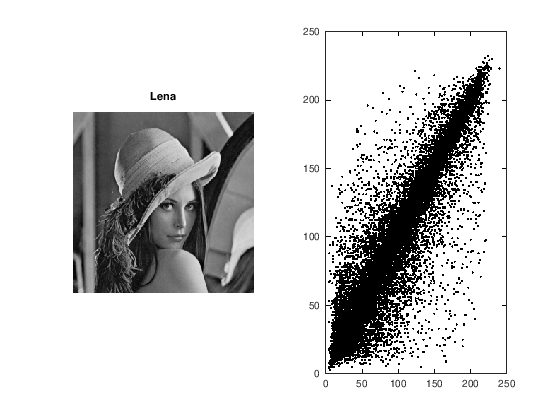

In [4]:
X = imread('imgs/lena256bw.pnm');
figure; subplot(1,2,1); imshow(X); title('Lena');
P = []; for i = 1:2:size(X,2), P = [P; X(:,[i i+1])]; endfor;
subplot(1,2,2); plot(P(:,1),P(:,2),'k.','markersize',3); 

Vamos projetar um quantizador vetorial uniforme com *codebook* de tamanho 16, de forma que cada região seja um quadrado de $64 \times 64$ com centróide no meio. Os centródes são definidos a seguir:

In [2]:
delta = 256/4;
v = round([0 + delta/2 : delta : 255 - delta/2 + 1]);
centroids = [];
for i=1:length(v), for j=1:length(v), centroids = [centroids; [v(i) v(j)]]; endfor; endfor;
%centroids = [32 32; 32 96; 32 160; 32 224; ...
%             96 32; 96 96; 96 160; 96 224; ...
%             160 32; 160 96; 160 160; 160 224; ...
%             224 32; 224 96; 224 160; 224 224];

Para realizar a quantização vetorial, iremos definir a função *vquantize* que irá aproximar cada um dos elementos ao longo das linhas de $P$ por um dos centróides, retornando o índice desta associação. Para escolher a melhor aproximação escolheremos aquela com a menor distância euclidena. No código abaixo definimos estas funções e apresentamos as regiões definidas e pontos de representação (*codebook*) sobre o gráfico de espalhamento feito anteriormente.

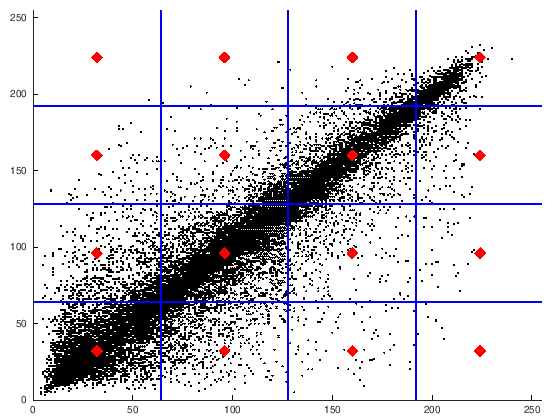

In [5]:
function d = distancia(x,y)
 d = sqrt( sum( (repmat(x,size(y,1),1) - y).^2, 2 ) );
endfunction

function idx = vquantize(P,centroids)
idx = [];
for k = 1 : size(P,1),
    d = distancia(P(k,:),centroids);
    [m id] = min(d);
    idx(k) = id;
endfor
endfunction

idx = vquantize(P,centroids);
[vx, vy] = voronoi(centroids(:,1), centroids(:,2));

figure; hold on;
plot(P(:,1),P(:,2),'k.','markersize',3);
plot (vx, vy, '-b', 'linewidth',5);
plot(centroids(:,1), centroids(:,2),'dr','markersize',10,'markerfacecolor','r');
axis([0 255 0 255 0 1]);


O particionamento do domínio é conhecido como particionamento de Dirichlet (também conhecido como regiões de [Voronoi](https://en.wikipedia.org/wiki/Voronoi_diagram)). Note que, no exemplo acima, algumas células possuem poucos pontos, não sendo assim bem utilizadas. Abaixo apresentamos o resultado da utilização deste quantizador.

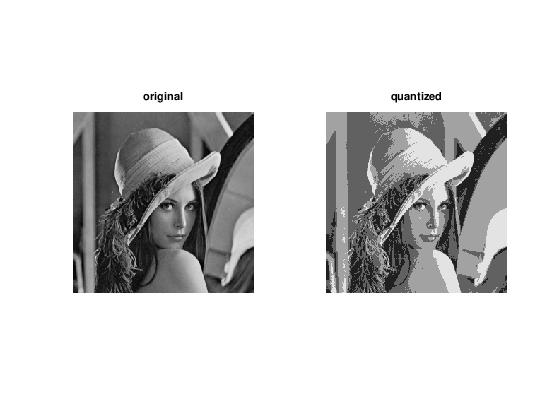

In [15]:
Pq = centroids(idx,:);
Xq = []; for i=1:256:size(Pq,1), Xq=[Xq Pq(i:i+255,:)]; endfor;
figure; subplot(1,2,1); imshow(X); title('original');
subplot(1,2,2); imshow(uint8(Xq)); title('quantized');

Como dito anteriormente, o quantizador uniforme utilizado é ineficiente. Ele poderia ser aprimorado se utilizássemos células menores em regiões mais densas e células maiores em regiões pouco densas. Para este fim, iremos utilizar o algoritmo das k-médias para obter um quantizador que fornecerá uma melhor performance.

No código abaixo iremos obter os centróides a partir do algorítmo das k-médias. As partições definidas e pontos de representação (*codebook*) são apresentados novamente sobre o gráfico de espalhamento. Note como agora as regiões menos densas estão associadas a células maiores e as regiões mais densas a células menores. Por fim, o quantizador definido é utilizado para aproximar a imagem da Lena. O resultado é nitidamente superior ao anterior.

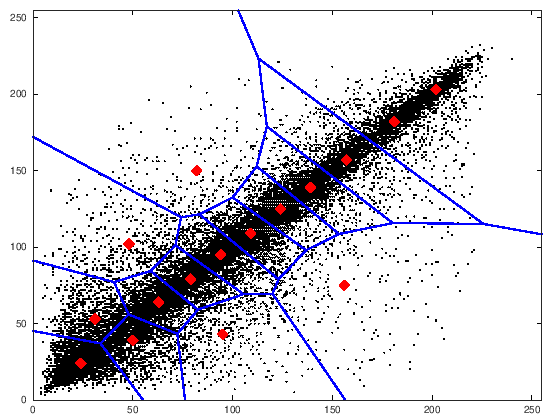

In [6]:
pkg load statistics

figure; plot(P(:,1),P(:,2),'k.','markersize',3);
k=16; [idx, centroids] = kmeans(double(P),k);
centroids = round(centroids);
[vx, vy] = voronoi(centroids(:,1), centroids(:,2));
hold on;
plot (vx, vy, '-b', 'linewidth',5);
plot(centroids(:,1), centroids(:,2),'dr','markersize',10,'markerfacecolor','r');
axis([0 255 0 255 0 1]);

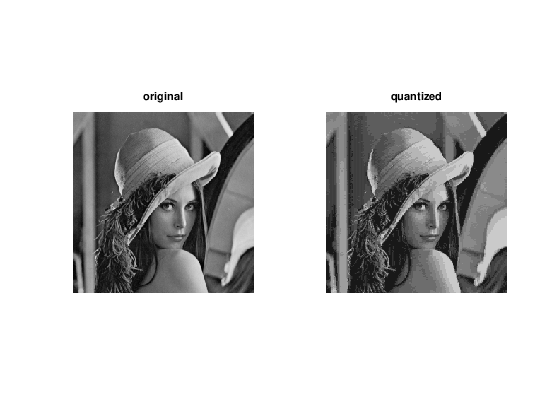

In [7]:
Pq = centroids(idx,:);
Xq = []; for i=1:256:size(Pq,1), Xq=[Xq Pq(i:i+255,:)]; endfor;
figure; subplot(1,2,1); imshow(X); title('original');
subplot(1,2,2); imshow(uint8(Xq)); title('quantized');

No projeto de um quantizador, desejamos encontrar um quantizador ótimo, constituído por um conjunto de $M$ pontos de representação, que minimiza o valor esperado da distorção. O quantizador atinge um ótimo local quando não pode alcançar, através de um procedimento de minimização da distorção, um outro quantizador que produza um melhor resultado.
A quantização vetorial pode ser vista como um problema de *clusterização*, sendo passível de ser formulado pelo problema das $k$-médias. Cada *cluster* é representado por um único ponto, ao qual associam-se todos os pontos contidos neste *cluster*. Os pontos pertencentes a um de terminado *cluster* estão mais próximos (segundo uma determinada métrica) ao ponto de representação associado ao seu *cluster* do que a qualquer outro ponto de representação. O problema de *clusterização* do $k$-médias resume-se ao problema de se encontrar o conjunto $\mathcal{C} = \{\hat{x}_1, \ldots, \hat{x}_k\}$ de $k$ pontos de representação para os $k$ *clusters* que irão se formar. Adota-se, então, $k=M$ para o tamanho do *codebook*.

Lloyd propôs um método iterativo, chamado de 'método I', para o projeto de um quantizador escalar (Lloyd, 1982). Este método foi, posteriormente, estendido por Linde et al. (1980) para o caso vetorial. O algoritmo para o caso de dados com uma distribuição de probabilidade desconhecida é dado a seguir:

1. Seja $M$ o número de pontos de representação e $\epsilon \geq 0$, um limiar de distorção. Considere um conjunto de representação inicial $\mathcal{C}^{(0)} = \{\hat{x}_1^{(0)} , \ldots, \hat{x}_M^{(0)}\}$, um conjunto de treinamento $\mathcal{T} = \{x_1, \ldots, x_N\}$ e $m=0$, o número inicial de iterações. 
2. Dado $\mathcal{C}^{(m)}$ encontre a partição mínima $P(\mathcal{C}^{(m)}) = \{S_i^{(m)}: i=1,\ldots,M\}$ das sequências de treinamento: $x_j \in S_i^{(m)}$ se $d(x_j, \hat{x}_i^{(m)}) \leq d(x_j, \hat{x}_l^{(m)})$, para
todo $l \neq i$. Calcule, então, a distorção média definida por:
\begin{align}
D^{(m)} &= D[(\mathcal{C}^{(m)}, P(\mathcal{C}^{(m)}))] \\
        &= \frac{1}{N} \sum_{j=1}^{N} \min_{\hat{x} \in \mathcal{C}^{(m)}} d(x_j, \hat{x}) .
\end{align}
3. Se $(D^{(m-1)} - D^{(m)}) / D^{(m)} \leq \epsilon$, interrompe a iteração e considera-se $\mathcal{C}^{(m)}$ como o alfabeto final de representação (\textit{codebook}); caso contrário, continue.
4. Encontre o alfabeto ótimo de representação para $P(\mathcal{C}^{(m)})$, $\hat{x}(P(\mathcal{C}^{(m)})) = \{\hat{x}(S_i): i = 1,\ldots, M\}$ para $P(\mathcal{C}^{(m)})$, onde
\begin{equation}
\hat{x}(S_i) = \frac{1}{|| S_i ||} \sum_{x \in S_i} x .
\end{equation}
5. Faça $\mathcal{C}^{(m+1)} = \hat{x}(P(\mathcal{C}^{(m)}))$, incremente $m$ e volte ao passo 2.

O algoritmo descrito acima utiliza um determinado $\mathcal{C}^{(0)}$ como *codebook* inicial para o processo de otimização. Existem diversas maneiras de escolher um alfabeto inicial, a mais simples delas consiste em escolher pontos de representação espaçados e coincidentes com os dados de treinamento, ou seja, os dados utilizados para se estabelecer o *codebook*.

O problema das $k$ médias é um problema NP-difícil, desta forma, qualquer algoritmo utilizável levará a uma solução ótima local para o problema. Métodos iterativos, como o de Lloyds, garantem melhorias sucessivas na solução a partir de um ponto inicial. Como a função de minimização, em geral, não é convexa, cada mínimo local terá uma região de atração para si. Os parâmetros de inicialização podem levar a diferentes soluções, algumas melhores que as demais.

Existem, ainda, várias outras formas de projetar um *codebook* para realizar a quantização vetorial, como por exemplo redes neurais, mapas auto organizáveis de Kohonen, recozimento simulado (*Simulated Annealing*), dentre outros.


## Exemplo: quantização de cores

Veremos agora um exemplo de aplicação da quantização vetorial para representar uma imagens *truecolor* através de uma palheta de cores.

As imagens coloridas chamadas de *truecolor* são aquelas que utilizam 8 bits por mais por componente RGB, totalizando 24 ou mais bits por pixel. Ou seja, para o caso de 24 bits por pixel, podemos a imagem *truecolor*  pode ter cores de um conjunto de 16.777.216 cores possíveis. Uma forma de representar imagens utilizando menos bits é utilizar uma palheta de cores restrita. Esta técnica foi muito utilizada nos primórdios da internet, quando surgiu o padrão GIF, ainda muito popular hoje, que tem como um dos seus alicerces a utilização de uma palheta de no máximo 256 cores (embora este limite possa ser superado, utilizando mais de uma palheta). Naquela época os monitores eram capazes de gerar uma gama limitada de cores, sendo assim desnecessário representar imagens digitais com uma [profundidade de bit](https://en.wikipedia.org/wiki/Color_depth) maior. Palhetas podem ser criadas para cada imagem, o que implica no *overhead* de transmitir/armazenar a palheta no cabeçalho da imagem, ou então pode-se utilizar uma palheta padrão. Nos promórdios da internet tornou-se muito difundida a palheta de 216 cores da Netscape.

![Palheta de 216 Cores Netscape](imgs/netscapecolorpallet2.png)


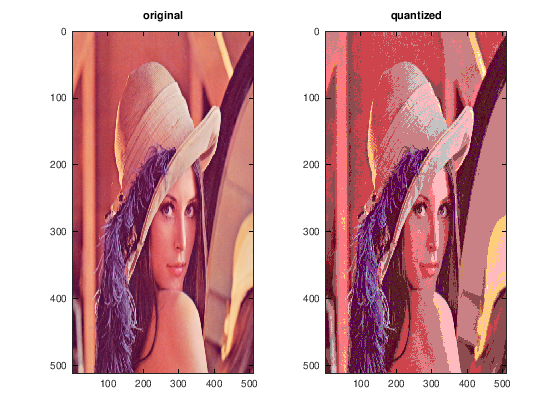

In [36]:
[imgC, C, a] = imread('imgs/netscapecolorpallet2.gif');
C = 255*unique(C,'rows');

X = imread('imgs/lena512rgb.png');
X = double(X);

% create N x D data table , N number of samples and D dimensions
P = reshape(X, [size(X,1)*size(X,2) 3]);
idx = vquantize(P,C);
Xq = reshape(C(idx,:), size(X));

figure;
subplot(1,2,1); image(uint8(X)); title('original');
subplot(1,2,2); image(uint8(Xq)); title('quantized');

O resultado acima apresenta a indexação da imagem da Lena utilizando a palheta de cores padrão Netscape. 

Iremos agora utilizar a abordagem de Lloyds vista anteriormente para encontrar uma palheta de cores otimizada para esta imagem. Note que, neste caso, faz-se necessário armazenar a palheta utilizada no cabeçalho da imagem para que o decodificador seja capaz de gerar a imagem com as cores corretas.


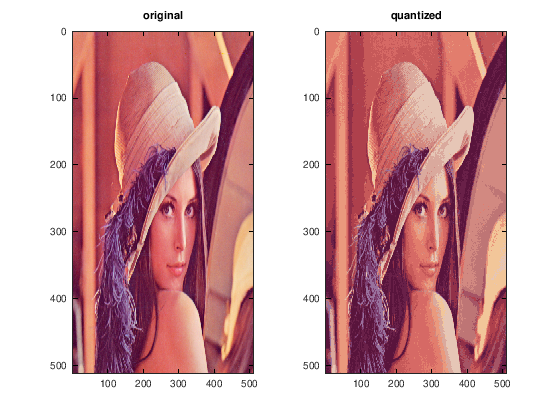

In [37]:
K = 16;
[idx, C, sumD, dist] = kmeans (P, K);
C = round(C);
% fix possible out of bound
[id1, id2] = find( C > 255);
if !isempty(id1), for i=1:length(id1), C(id1(i),id2(i)) = 255; endfor; endif
[id1, id2] = find( C < 0);
if !isempty(id1), for i=1:length(id1), C(id1(i),id2(i)) = 0; endfor; endif

Pq = C(idx,:);
Xq = reshape(Pq, size(X));

figure;
subplot(1,2,1); image(uint8(X)); title('original');
subplot(1,2,2); image(uint8(Xq)); title('quantized');

Note que ao utilizar uma palheta de cores otimizada, mesmo sendo esta bem menor (apenas 16 cores), conseguimos uma representação mais fidedigna das cores da imagem original.

### Median Cut

Outro método comumente utilizado para obter uma palheta de cores para uma imagem é o algorirmo *median cut* (corte na mediana). Este algoritmo consiste formar um vetor com todos os valores (cores) existentes na amostra (com repetição) e em seguida ordená-los para então dividir o vetor em sua mediana. No caso das cores, como cada cor possuir 3 componentes (RGB), a ordenação será feita sobre a componente com maior extensão. Após dividir o vetor, o processo é repetido nos dois vetores gerados após a divisão. Este processo é repetido recursivamente até gerarmos um número de vetores, resultantes das sucessivas divisões, igual ao número de elementos que desejamos ter no *codebook*. Ao final, tomamos o valor médio de cada um dos vetores resultantes para ser cada uma das entradas do *codebook* (pontos de representação). Abaixo transcrevemos a função para encontrar a palheta de cores (*codebook*) através do algoritmo *median cut*.

In [5]:
function colors = mediancut(X, n)

  if isrgb (X),
     NROWS = size(X,1);
     NCOLS = size(X,2);
     X = permute (X, [3 1 2]);
     X = reshape (X, [NROWS*NCOLS 3]);
  endif

  MIN = min(X);
  MAX = max(X);
  RANGE = MAX - MIN;
  [ _ , iX] = max(RANGE);
  [ _ , idx] = sort(X(:,iX));
  LENX = size(X,1);

  colors = [];
  M = round(LENX/2);
  if n > 1,
     colors = [colors; mediancut(X(idx(1:M),:), n-1); mediancut(X(idx(M+1:end),:), n-1)];
  else,
     colors = [round(mean(X(idx(1:M),:))); round(mean(X(idx(M+1:end),:)))];
  endif

  [ _ , ic] = sort(colors(:,iX));
  colors = colors(ic,:);

endfunction

A seguir a função para realizar a quantização vetorial das cores de uma imagem, dada uma palheta de cores.

In [6]:
function d = distance (X, p);

   X = double(X);
   p = double(p);

   d = [];
   for i = 1 : size(p,1),
       d(:,i) = sqrt(sum( (X - p(i,:)).^2, 2 ) );
   endfor

endfunction

In [7]:
function [id, Xq] = cquantize(X, colors)

     NROWS = size(X,1);
     NCOLS = size(X,2);
     X = reshape (X, [NROWS*NCOLS 3]);

     D = distance (X, colors);

     [_, id] = min(D,[],2);

     if nargout > 1,
        Xq = colors(id,:);
        Xq = reshape (Xq, [NROWS, NCOLS, 3]);
     endif

endfunction

E abaixo apresentamos a utilizado desta abordagem para criar uma imagem com cores indexadas, com uma palheta de cores criada a partir do algoritmo de *median cut*.

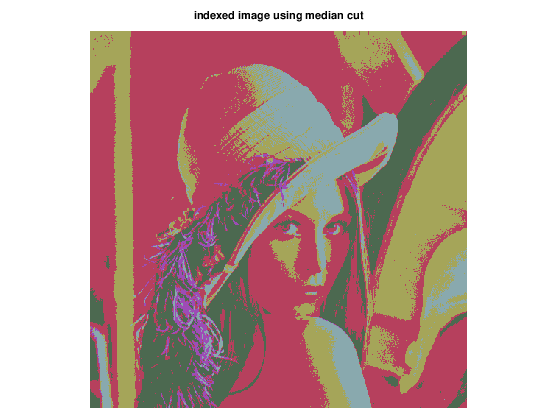

In [8]:
pkg load image
X = imread('imgs/lena512rgb.png');
colors = mediancut(X, 3);
[iq, Xq] = cquantize(X, colors);
figure; imshow (uint8(Xq)); title('indexed image using median cut');